<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-using-Navie-Bayes-Algorithm/blob/main/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [2]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [11]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [7]:
x=df.iloc[:,:-1].values
x

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [8]:
y=df.iloc[:,-1].values
y

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)

In [9]:
x.ndim

2

In [10]:
y.ndim

1

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 1. , 15.1,  6.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 12.6,  5.1, ...,  0. ,  0. ,  0. ],
       [ 1. , 11.9,  5.9, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12. ,  5.9, ...,  0. ,  0. ,  0. ],
       [ 1. , 12.8,  5.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 11.4,  5.5, ...,  0. ,  0. ,  0. ]])

In [13]:
x_test

array([[ 1. , 13.2,  5.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 13.7,  6. , ...,  0. ,  0. ,  0. ],
       [ 0. , 12.9,  5.3, ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 12.3,  6.6, ...,  1. ,  0. ,  1. ],
       [ 1. , 12.1,  5.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.7,  6.7, ...,  1. ,  0. ,  0. ]])

In [14]:
y_train

array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [15]:
y_test

array(['Male', 'Female', 'Female', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[1.        , 0.90243902, 0.8       , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.29268293, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.12195122, 0.4       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.14634146, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.34146341, 0.15      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
x_test

array([[1.        , 0.43902439, 0.3       , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.56097561, 0.45      , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36585366, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.2195122 , 0.75      , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.17073171, 0.3       , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.80487805, 0.8       , ..., 1.        , 0.        ,
        0.        ]])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
k_model=KNeighborsClassifier(n_neighbors=7)
nb_model=GaussianNB()
sv_model=SVC()
model=[k_model,nb_model,sv_model]

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[714  25]
 [ 28 734]]
0.9646902065289806
              precision    recall  f1-score   support

      Female       0.96      0.97      0.96       739
        Male       0.97      0.96      0.97       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501

****************************************************************************************************
[[715  24]
 [ 28 734]]
0.9653564290473018
              precision    recall  f1-score   support

      Female       0.96      0.97      0.96       739
        Male       0.97      0.96      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

****************************************************************************************************
[[717  22]
 [ 31 731]]
0.9646902065289806
              prec

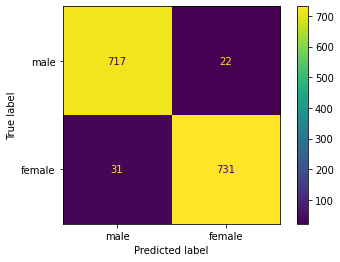

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
labels=['male','female']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()